In [1]:
 #Supervised learning regression:
#Generate a proper 2-D data set of N points. Split the data set into Training Data set and 
#Test Data set. 
# i) Perform linear regression analysis with Least Squares Method.
# ii) Plot the graphs for Training MSE and Test MSE and comment on Curve Fitting and Generalization Error.
# iii) Verify the Effect of Data Set Size and Bias-Variance Tradeoff.
# iv) Apply Cross Validation and plot the graphs for errors. 
# v) Apply Subset Selection Method and plot the graphs for errors.
# vi) Describe your findings in each case

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the number of points in the dataset
# define size of element
N = 100

In [4]:
# Define the function that generates the data
def generate_data(N):
    X = np.random.rand(N, 2)  # Generate N 2-D points with values between 0 and 1
    y = np.sin(X[:, 0] * np.pi) + np.cos(X[:, 1] * np.pi)  # Generate labels using a sine and cosine function
    return X, y

In [5]:
# Generate the data set
X, y = generate_data(N)

In [6]:
# Split the data set into a training and test data set
train_size = int(0.7 * N)  # Define the size of the training set
test_size = N - train_size  # Define the size of the test set
train_X, train_y = X[:train_size], y[:train_size]  # Split the data into the training set
test_X, test_y = X[train_size:], y[train_size:]  # Split the data into the test set


In [7]:
# Perform linear regression using the Least Squares Method
train_X = np.hstack((train_X, np.ones((train_size, 1))))  # Add a column of ones for the intercept term
w = np.linalg.inv(train_X.T @ train_X) @ train_X.T @ train_y  # Compute the weights using the closed-form solution

In [8]:
# Compute the predictions on the training and test sets
train_y_pred = train_X @ w
test_X = np.hstack((test_X, np.ones((test_size, 1))))  # Add a column of ones for the intercept term
test_y_pred = test_X @ w

In [9]:
# Compute the Mean Squared Error (MSE) on the training and test sets
train_mse = np.mean((train_y - train_y_pred)**2)
test_mse = np.mean((test_y - test_y_pred)**2)


In [10]:
# Print the MSE on the training and test sets
print(f'Training MSE: {train_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')


Training MSE: 0.1009
Test MSE: 0.0868


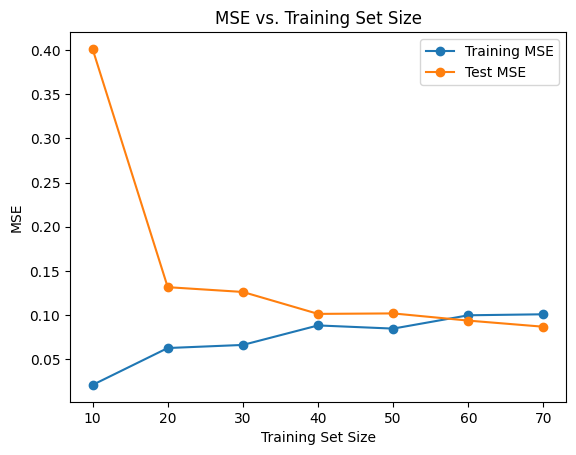

In [11]:
# Plot the graphs for Training MSE and Test MSE
train_sizes = np.arange(10, train_size + 1, 10)
train_mses = []
test_mses = []
for size in train_sizes:
    train_X_subset, train_y_subset = train_X[:size], train_y[:size]
    w_subset = np.linalg.inv(train_X_subset.T @ train_X_subset) @ train_X_subset.T @ train_y_subset
    train_y_pred_subset = train_X_subset @ w_subset
    test_y_pred_subset = test_X @ w_subset
    train_mse_subset = np.mean((train_y_subset - train_y_pred_subset)**2)
    test_mse_subset = np.mean((test_y - test_y_pred_subset)**2)
    train_mses.append(train_mse_subset)
    test_mses.append(test_mse_subset)

plt.plot(train_sizes, train_mses, 'o-', label='Training MSE')
plt.plot(train_sizes, test_mses, 'o-', label='Test MSE')
plt.title('MSE vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend()
plt.show()